### Modelo Regressão:


## Projeto de Aprendizado de Máquina: Previsão de Preços de Casas

Neste projeto de aprendizado de máquina, utilizaremos dados de uma competição disponibilizados no Kaggle, que se referem aos preços de casas. O objetivo é aplicar diferentes modelos de regressão, incluindo árvore de decisão, para minimizar a função de perda (Loss Function) e, assim, proporcionar aos vendedores uma maneira apropriada de avaliar seus imóveis.

**Dataset**: [House Prices](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)

Métricas usadas:

- MAE - Mean Absolute Error <br>
- MAPE - Mean Absolute percentage Error <br>
- MSE - Mean Squared Error <br>
- MRSE - Mean Root Squared Error. <br>

In [2]:
#Importando bibliotecas e condições de visualização.

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 40)
pd.set_option('display.max_columns', None)

plt.style.use('ggplot')

In [3]:
#Exibindo o dataset avaliado.

df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
'''Avaliar quantidade de valores nulos, como podemos ver existem colunas com grande quantidade de valores nulos,
nesse caso como temos diversas features podemos exclui-las. Porém em um caso específico essa análise poderia ser mais
aprofundada.'''

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
#colunas para retirar que tenho mais de 30 valores nulos.

missing = df.isnull().mean() * 100

cols_to_drop = missing[missing > 30].index.tolist()

df.drop(cols_to_drop, axis=1, inplace=True)

In [6]:
df.shape

(1460, 75)

In [7]:
#Dividir em features e target

X = df.drop(columns=['SalePrice', 'Id'])
y = df['SalePrice']

In [8]:
# Dividir em dados de treino e teste antes do processamento, o que evita data leakage.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

## Observe

Neste dataset, temos 74 colunas (features), que podem ser divididas em colunas quantitativas e qualitativas. No entanto, algumas das variáveis quantitativas podem representar variáveis categóricas, como, por exemplo, a cor (tonalidade). É importante que o modelador analise feature por feature para chegar à melhor conclusão sobre o processamento a ser realizado.

No mundo real, devido à grande quantidade de features e à limitação de tempo e recursos, é necessário buscar opções que otimizem nosso trabalho, tais como:

- Considerar as variáveis do tipo 'object' como categóricas e as do tipo 'int64' e 'float64' como numéricas.
- Caso uma variável numérica tenha um número elevado de valores distintos, ela continuará sendo considerada numérica; no entanto, se o número de valores distintos for baixo, pode ser tratada como categórica.


**Neste exemplo, abordaremos a primeira abordagem por questões de simplicidade e estudo.**

In [9]:
#Dividindo em variáveis numéricas e categóricas.

num_features = X_train.select_dtypes(include=['number']).columns
cat_features = X_train.select_dtypes(include=['object']).columns

In [10]:
print(f'O dataset possui {num_features.shape[0]} variáveis numéricas e {cat_features.shape[0]} variáveis categóricas')

O dataset possui 36 variáveis numéricas e 37 variáveis categóricas


In [11]:
#Importando bibliotecas

from sklearn.pipeline import Pipeline, FeatureUnion #Pileline para organização do código (compilar transformações)
from sklearn.compose import ColumnTransformer #Transformar as colunas a partir das transformações necessárias
from sklearn.preprocessing import StandardScaler, MinMaxScaler #Padronização média da variável igual a 0 e desvio padrão igual a 1
from sklearn.impute import SimpleImputer #imputar missing com média, mediana, etc
from sklearn.ensemble import RandomForestRegressor #Modelo de regressão
from lightgbm import LGBMRegressor #Outro Modelo de regressão
from sklearn.feature_selection import RFE 
from category_encoders import OneHotEncoder, TargetEncoder #transformar variáveis categóricas em numéricas (para que os algoritmos possa interpretar)

#Transformações organizadas em um pipeline para variáveis numéricas.

num_pipeline = Pipeline([
    ('imputernum', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

#Transformações organizadas em um pipeline para variáveis categóricas.

cat_pipeline = Pipeline([
    ('imputercat', SimpleImputer(strategy='most_frequent')),
    ('encoder', TargetEncoder()) 
])

#one hot encoder gera diversas features, o que acaba gerando um erro muito grande
#Target encoder pode ser uma opção.

#Aplicar as transformações feitas no pipeline nas colunas numéricas e categóricas devidamente separadas anteriormente

preprocessor = ColumnTransformer(
    transformers=[
        ("numtransf", num_pipeline, num_features),
        ('cattransf', cat_pipeline, cat_features)
    ]
)

#Aplicar o modelo de Regressão, nesse caso optamos pelo mais simples.

from sklearn.linear_model import LinearRegression

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numtransf',
                                                  Pipeline(steps=[('imputernum',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2nd...
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('regressor', LinearRegression())])

## Ajuste de hiperparâmetros

- Poderiamos aqui ajustar os hiperparâmetros do modelo para que assim obtivessemos um melhor resultado final.

## Performance do modelo

- O resultado do nosso modelo pode ser avaliada pelas métricas exibidas abaixo, as quais avaliam o erro (Loss function) do modelo.

In [12]:
y_pred = pipe.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 19785.234765994384
Mean Absolute Percentage Error (MAPE): 11.819404050177514%
Mean Squared Error (MSE): 985504865.1084917
Root Mean Squared Error (RMSE): 31392.751792547457


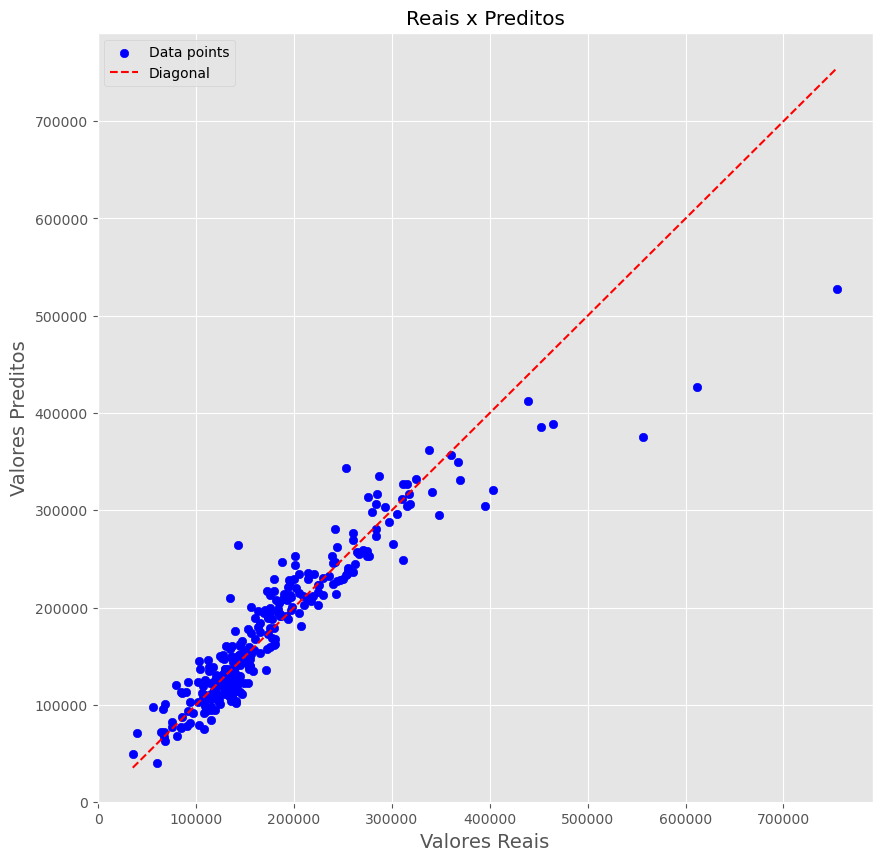

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.style.use('ggplot')

plt.scatter(y_test, y_pred, c='blue', label='Data points')

plt.xlabel('Valores Reais', fontsize=14)
plt.ylabel('Valores Preditos', fontsize=14)
plt.title('Reais x Preditos')

min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Diagonal')

plt.legend()

plt.show()

## Observe:

Abaixo testamos outros modelos de machine learning em um loop para verificar qual possui a melhor performance. Sendo o GradientBoostingRegressor o algoritmo de melhor resultado.


Além disso, em algoritmos derivados de Árvore de decisão não precisa fazer o Scaling das variáveis numéricas pois a divisão é feita com base no valor absoluto (Entrophy e Coeficiente de Gini), porém nesse caso utilizamos.

In [14]:
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

numeric_list = [
    DecisionTreeRegressor(),
    KNeighborsRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor()
]

for numeric in numeric_list:
    num_pipeline = Pipeline([
    ('imputernum', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

    #Transformações organizadas em um pipeline para variáveis categóricas.

    cat_pipeline = Pipeline([
        ('imputercat', SimpleImputer(strategy='most_frequent')),
        ('encoder', TargetEncoder()) 
    ])

    #one hot encoder gera diversas features, o que acaba gerando um erro muito grande
    #Target encoder pode ser uma opção.

    #Aplicar as transformações feitas no pipeline nas colunas numéricas e categóricas devidamente separadas anteriormente

    preprocessor = ColumnTransformer(
        transformers=[
            ("numtransf", num_pipeline, num_features),
            ('cattransf', cat_pipeline, cat_features)
        ]
    )

    #Aplicar o modelo de Regressão, nesse caso optamos pelo mais simples.

    from sklearn.linear_model import LinearRegression

    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', numeric)
    ])

    pipe.fit(X_train, y_train)
    
    y_pred = pipe.predict(X_test)


    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(numeric)
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}\n")

DecisionTreeRegressor()
Mean Absolute Error (MAE): 25665.77397260274
Mean Absolute Percentage Error (MAPE): 14.682576124577265%
Mean Squared Error (MSE): 1734776919.089041
Root Mean Squared Error (RMSE): 41650.653285261214

KNeighborsRegressor()
Mean Absolute Error (MAE): 29678.918493150682
Mean Absolute Percentage Error (MAPE): 17.707958103375166%
Mean Squared Error (MSE): 2212553787.9880824
Root Mean Squared Error (RMSE): 47037.79106195446

RandomForestRegressor()
Mean Absolute Error (MAE): 16889.06928082192
Mean Absolute Percentage Error (MAPE): 10.26594568430318%
Mean Squared Error (MSE): 807778533.5383278
Root Mean Squared Error (RMSE): 28421.444958663305

GradientBoostingRegressor()
Mean Absolute Error (MAE): 16275.661258557186
Mean Absolute Percentage Error (MAPE): 9.747261473102347%
Mean Squared Error (MSE): 713827901.3392168
Root Mean Squared Error (RMSE): 26717.55792244525

